### Reading in Data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

df = pd.read_csv('Pakistan Largest Ecommerce Dataset.csv',
                       low_memory = False,
                       encoding = 'utf-8',
                       usecols = [i for i in range(21)],
                       dtype = {'item_id':str, 'Customer ID':str})
pd.set_option('display.max_columns',None)

df[['created_at', 'Working Date','M-Y', 'Customer Since']] = df[['created_at', 'Working Date','M-Y','Customer Since']].apply(pd.to_datetime)

df_orig = df
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131,complete,2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,2016-07-01,#REF!,"1,950",2016.0,7.0,2016-07-01,2016-07-01,FY17,1
1,211133,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,2016-07-01,Gross,240,2016.0,7.0,2016-07-01,2016-07-01,FY17,2
2,211134,canceled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,2016-07-01,Gross,"2,450",2016.0,7.0,2016-07-01,2016-07-01,FY17,3
3,211135,complete,2016-07-01,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,2016-07-01,Net,360,2016.0,7.0,2016-07-01,2016-07-01,FY17,4
4,211136,order_refunded,2016-07-01,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,2016-07-01,Valid,"1,110",2016.0,7.0,2016-07-01,2016-07-01,FY17,5


### Data Preprocessing and Feature Engineering

##### Quick breakdown of non-null rows and their data types

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                584524 non-null  object        
 1   status                 584509 non-null  object        
 2   created_at             584524 non-null  datetime64[ns]
 3   sku                    584504 non-null  object        
 4   price                  584524 non-null  float64       
 5   qty_ordered            584524 non-null  float64       
 6   grand_total            584524 non-null  float64       
 7   increment_id           584524 non-null  object        
 8   category_name_1        584360 non-null  object        
 9   sales_commission_code  447349 non-null  object        
 10  discount_amount        584524 non-null  float64       
 11  payment_method         584524 non-null  object        
 12  Working Date           584524 non-null  da

##### There are quite a lot of null values in this data. And they all contain the same % of nulls as well.

In [3]:
#This method prints the percentage of null values in each column relative to the length of the dataframe
def printPercentNull(df):
    for col in df.columns:
        percent_missing = np.mean(df[col].isnull())
        print('{} - {}%'.format(col, round(percent_missing*100)))

##### Printing Null Percentage in each column

In [4]:
printPercentNull(df)

item_id - 44%
status - 44%
created_at - 44%
sku - 44%
price - 44%
qty_ordered - 44%
grand_total - 44%
increment_id - 44%
category_name_1 - 44%
sales_commission_code - 57%
discount_amount - 44%
payment_method - 44%
Working Date - 44%
BI Status - 44%
 MV  - 44%
Year - 44%
Month - 44%
Customer Since - 44%
M-Y - 44%
FY - 44%
Customer ID - 44%


##### Checking how many null values are in each row, they are almost all the same

In [5]:
df.isnull().sum()

item_id                  464051
status                   464066
created_at               464051
sku                      464071
price                    464051
qty_ordered              464051
grand_total              464051
increment_id             464051
category_name_1          464215
sales_commission_code    601226
discount_amount          464051
payment_method           464051
Working Date             464051
BI Status                464051
 MV                      464051
Year                     464051
Month                    464051
Customer Since           464062
M-Y                      464051
FY                       464051
Customer ID              464062
dtype: int64

###### Dropping rows where all columns are null

In [6]:
df = df.dropna(how='all')

In [7]:
print("Original Length of DataFrame:",len(df_orig), "New Length:", len(df),":", len(df_orig) - len(df),'rows removed.')

Original Length of DataFrame: 1048575 New Length: 584524 : 464051 rows removed.


##### New Percentage of rows null, all columns have none except for sales_comission_code

In [8]:
printPercentNull(df)

item_id - 0%
status - 0%
created_at - 0%
sku - 0%
price - 0%
qty_ordered - 0%
grand_total - 0%
increment_id - 0%
category_name_1 - 0%
sales_commission_code - 23%
discount_amount - 0%
payment_method - 0%
Working Date - 0%
BI Status - 0%
 MV  - 0%
Year - 0%
Month - 0%
Customer Since - 0%
M-Y - 0%
FY - 0%
Customer ID - 0%


#### Converting Date to datetime

In [9]:
df.loc['created_at'] = pd.to_datetime(df['created_at'])

C:\Users\timo7\anaconda3\envs\ECS 171\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


##### Grouping together month and Year

In [89]:
df['Year-Month'] = df['created_at'].dt.to_period('M')

<ipython-input-89-d3833f0eeab4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year-Month'] = df['created_at'].dt.to_period('M')


##### Extracting year from date

In [101]:
df['created_at_year'] = df['created_at'].dt.year

<ipython-input-101-cfbf8d1514ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['created_at_year'] = df['created_at'].dt.year


##### The data starts from July 2016 and ends in August 2018

In [10]:
print(df['created_at'].min())
print(df['created_at'].max())

2016-07-01 00:00:00
2018-08-28 00:00:00


##### A quick look into sales_commission_code tells us that most of the values are '\N'.

In [11]:
df['sales_commission_code'].value_counts()

\N                 339001
40968                2710
C-LHW-50074          2434
C-RWP-31924          1720
cisb30211            1613
                    ...  
E/C LHE- 107189         1
rskz                    1
R SKZ 47335             1
66036-lhc               1
Cc ISB 42280            1
Name: sales_commission_code, Length: 7226, dtype: int64

In [32]:
print("There are", len(df['category_name_1'].value_counts()), "types of products")
df['category_name_1'].value_counts()

There are 16 types of products


Mobiles & Tablets     115710
Men's Fashion          92221
Women's Fashion        59721
Appliances             52413
Superstore             43613
Beauty & Grooming      41496
Soghaat                34011
Others                 29218
Home & Living          26504
Entertainment          26326
Health & Sports        17502
Kids & Baby            16494
Computing              15933
\N                      7850
School & Education      3478
Books                   1870
Name: category_name_1, dtype: int64

##### Soghaat is food related items

In [14]:
df[df['category_name_1'] == 'Soghaat']['sku'].value_counts().head(15)

Al Muhafiz Sohan Halwa Almond                  2258
Al Muhafiz Sohan Halwa Walnut                   931
RS_Plain Rusk Pack of 3                         799
RS_Habshi Halwa Tin                             781
RS_Soan Papri-250gm                             726
RS_Plain Rusk                                   685
RS_Coconut Bites                                600
shahi_buy one get one free Shahi Munchy Mix     519
RS_Soan Papri-500gm                             428
RS_Sohan Halwa Tin                              409
shahi_buy one get one free Shahi Savory Mix     397
shahi_buy one get one free Shahi Dal Moong      371
SN_Muzadati-500gm                               371
shahi_buy one get one free Shahi Chewra         362
shahi_buy one get one free Shahi Dal Moth       360
Name: sku, dtype: int64

##### \N contains phones, but also has other items like food, and some names for test-products
##### its highest count item description is called 'emart', which isn't descriptive enough to give details to what it is

In [33]:
df[df['category_name_1'] == '\\N']['sku'].value_counts().head(15)

emart_00-1                           1343
Telemall_MM-DR-HB-L                   878
test-product-00                       774
test-product                          613
Infinix Hot 4 Nationwide-Gold         479
RB_Dettol Germ Busting Kit-bf         404
Infinix Hot 4 Nationwide-Black        344
Trans2_LW 999                         251
SP_Mango_Special                      222
RS_Rehmat-e-Shereen Mix Mithai        218
test-product-3                        184
Infinix Hot 4 Hazir-Black-Karachi     153
Infinix Hot 4 Hazir-Gold-Karachi      140
Infinix Hot 4 Hazir-Black-Lahore      128
Infinix Hot 4 Hazir-Gold-Lahore       120
Name: sku, dtype: int64

##### There are quite a lot of orders that have been cancelled or refunded, more than the actual complete sales

In [16]:
df['status'].value_counts()

complete          233685
canceled          201249
received           77290
order_refunded     59529
refund              8050
cod                 2859
paid                1159
closed               494
payment_review        57
pending               48
processing            33
holded                31
fraud                 10
pending_paypal         7
\N                     4
exchange               4
Name: status, dtype: int64

#### Orders are separated by their Status, we can calculate revenue by taking the sum of grand totals of orders that have not been cancelled and have not been refunded, etc.

In [17]:
df_complete = df[(df['status'] == 'complete') | (df['status'] == 'received')]
df_complete

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,created_at_year
0,211131,complete,2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,2016-07-01,#REF!,"1,950",2016.0,7.0,2016-07-01,2016-07-01,FY17,1,2016.0
3,211135,complete,2016-07-01,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,2016-07-01,Net,360,2016.0,7.0,2016-07-01,2016-07-01,FY17,4,2016.0
6,211138,complete,2016-07-01,kcc_krone deal,360.0,1.0,60.0,100147449,Beauty & Grooming,\N,300.0,cod,2016-07-01,Net,360,2016.0,7.0,2016-07-01,2016-07-01,FY17,7,2016.0
7,211139,complete,2016-07-01,UK_Namkino Mix Nimco 400 Gms,170.0,1.0,170.0,100147450,Soghaat,\N,0.0,cod,2016-07-01,Net,170,2016.0,7.0,2016-07-01,2016-07-01,FY17,6,2016.0
10,211142,complete,2016-07-01,"GFC_Pedestal Myga Cross Base (Special Guard) 24""",5500.0,1.0,5500.0,100147453,Appliances,\N,0.0,cod,2016-07-01,Net,"5,500",2016.0,7.0,2016-07-01,2016-07-01,FY17,9,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584207,904834,received,2018-08-27,WOFSHO5AA7F46F5D965,250.0,1.0,400.0,100562180,Women's Fashion,NaN,0.0,cod,2018-08-27,Valid,250,2018.0,8.0,2018-08-01,2018-08-01,FY19,115268,2018.0
584277,904923,received,2018-08-27,BKSMAR5B51C2B65F876,2000.0,1.0,2250.0,100562229,Books,NaN,0.0,cod,2018-08-27,Valid,"2,000",2018.0,8.0,2018-08-01,2018-08-01,FY19,115285,2018.0
584338,904992,received,2018-08-27,JAZ5A5F32D397D60,445.5,1.0,595.5,100562274,Superstore,80111,0.0,cod,2018-08-27,Valid,446,2018.0,8.0,2016-08-01,2018-08-01,FY19,2633,2018.0
584340,904994,received,2018-08-27,BAGEMA5ACCB4FF1C93E,166.0,1.0,316.0,100562276,Beauty & Grooming,NaN,0.0,jazzwallet,2018-08-27,Valid,166,2018.0,8.0,2018-08-01,2018-08-01,FY19,115299,2018.0


### Revenue Generated Each Year

###### This Bar Chart does not give the whole revenue for the years 2016 and 2018 because the data does not encompass their entire years

<bound method _AxesBase.set_xlabel of <AxesSubplot:xlabel='created_at_year', ylabel='Sum of Grand Total'>>

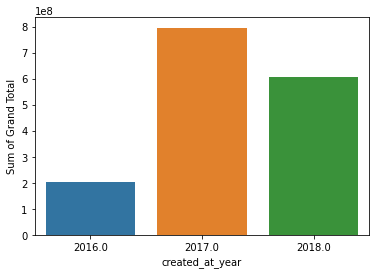

In [18]:
groupby_revenue_year = df_complete.groupby('created_at_year')['grand_total'].sum()

ax = sns.barplot(x = groupby_revenue_year.index,
            y = groupby_revenue_year.values)
ax.set_ylabel('Sum of Grand Total')
ax.set_xlabel

2018 most likely generated more revenue than 2017, as the data does not cover the entire year of 2016 and 2018

### Breakdown of Units Sold for Each Category

#### Grand Total Across All Years


##### Mobiles and Tablets by Far Have Generated the Most Revenue From 2016-2018

<AxesSubplot:ylabel='category_name_1'>

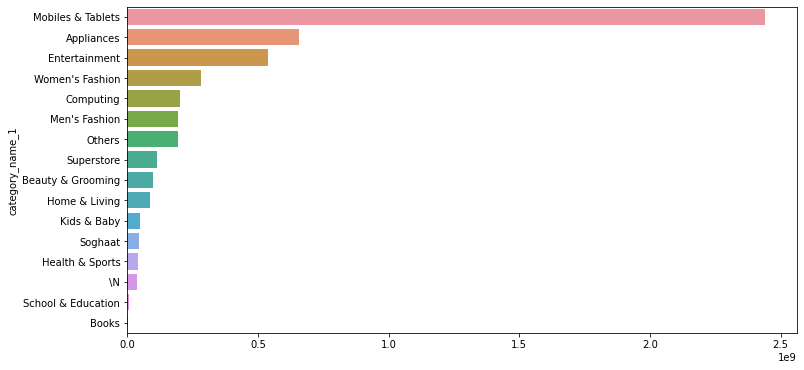

In [19]:
plt.figure(figsize = (12,6))
sns.barplot(y = df.groupby('category_name_1')['grand_total'].sum().sort_values(ascending=False).index,
            x = df.groupby('category_name_1')['grand_total'].sum().sort_values(ascending=False).values,
            orient = 'horizontal')

### Breaking Down the Revenue Generated by Each Product By Year

In [20]:
df_complete['created_at_year'].value_counts()

2017.0    157608
2016.0     77495
2018.0     75872
Name: created_at_year, dtype: int64

In [21]:
revenue_by_year_product = df_complete.groupby(['created_at_year','category_name_1'])['grand_total'].sum()
revenue_by_year_product

created_at_year  category_name_1   
2016.0           Appliances            2.949672e+07
                 Beauty & Grooming     9.708874e+06
                 Books                 4.446309e+05
                 Computing             5.200349e+06
                 Entertainment         1.686654e+07
                 Health & Sports       4.376228e+06
                 Home & Living         7.879658e+06
                 Kids & Baby           3.435921e+06
                 Men's Fashion         1.911537e+07
                 Mobiles & Tablets     5.844694e+07
                 Others                2.773097e+06
                 School & Education    1.189642e+06
                 Soghaat               7.466252e+06
                 Superstore            4.708470e+06
                 Women's Fashion       1.618556e+07
                 \N                    1.755082e+07
2017.0           Appliances            9.789770e+07
                 Beauty & Grooming     2.656914e+07
                 Books      

##### Crosstabular of Years and the Revenue Brought in by each Product

In [22]:
revenue_by_year_product_unstacked = revenue_by_year_product.unstack(level = 0)
revenue_by_year_product_unstacked

created_at_year,2016.0,2017.0,2018.0
category_name_1,,,
Appliances,29496716.09,9.789770e+07,1.062107e+08
Beauty & Grooming,9708873.99,2.656914e+07,1.211164e+07
Books,444630.88,7.105234e+05,4.000276e+05
Computing,5200349.04,2.094792e+07,2.226869e+07
Entertainment,16866536.34,8.802369e+07,8.720807e+07
Health & Sports,4376227.74,8.491905e+06,8.485075e+06
Home & Living,7879657.94,2.133175e+07,9.336741e+06
Kids & Baby,3435921.32,1.120931e+07,4.775813e+06
Men's Fashion,19115371.31,4.993841e+07,1.727573e+07


### Revenue Generated By Each product Each Year

Text(0, 0.5, 'Product Type Sold in 2018')

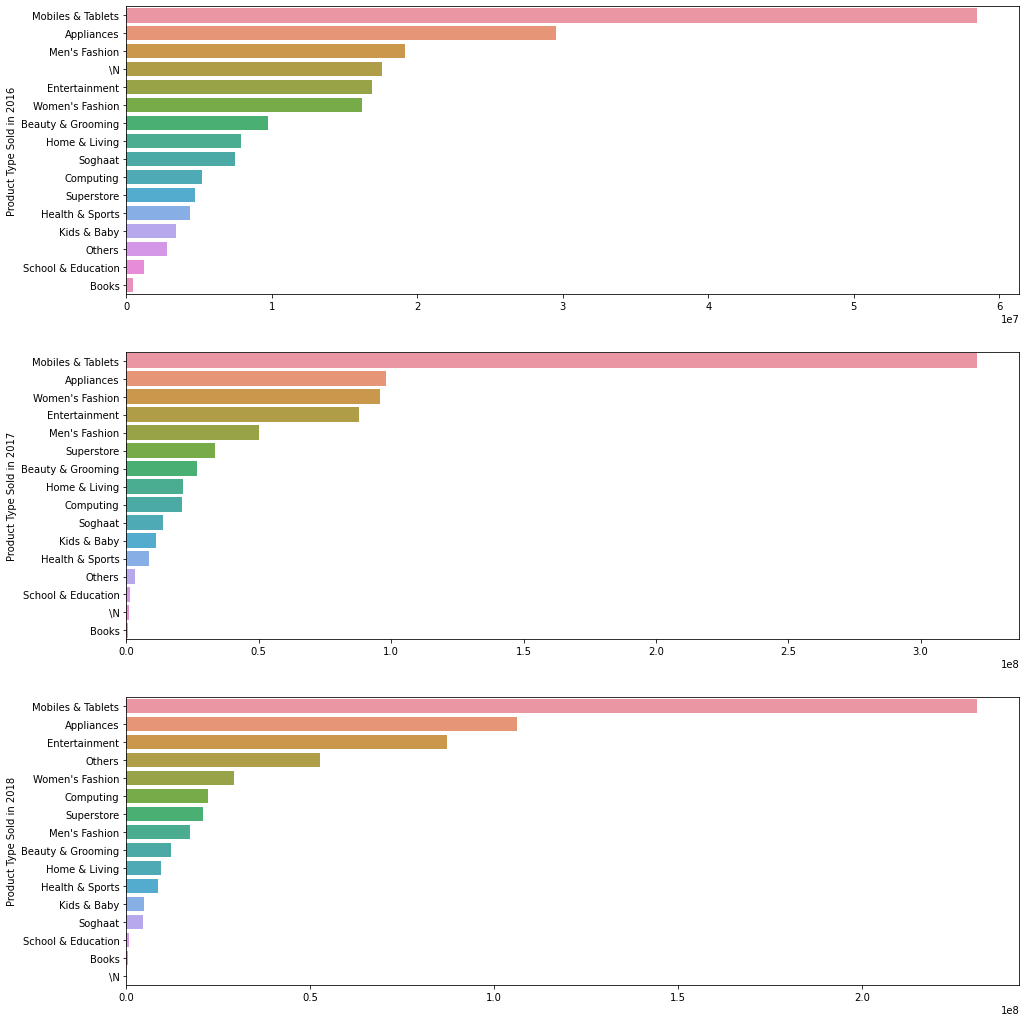

In [24]:
fig, ax = plt.subplots(3,1,figsize = (16,18))

products_2016 = sns.barplot(x = revenue_by_year_product_unstacked[2016.0].sort_values(ascending=False).values,
                            y = revenue_by_year_product_unstacked[2016.0].sort_values(ascending=False).index, ax = ax[0],
                           orient = 'hori')
products_2016.set_ylabel('Product Type Sold in 2016')

products_2017 = sns.barplot( x = revenue_by_year_product_unstacked[2017.0].sort_values(ascending=False).values,
                            y = revenue_by_year_product_unstacked[2017.0].sort_values(ascending=False).index, ax = ax[1],
                           orient = 'hori')
products_2017.set_ylabel('Product Type Sold in 2017')

products_2018 = sns.barplot( x = revenue_by_year_product_unstacked[2018.0].sort_values(ascending=False).values,
                            y = revenue_by_year_product_unstacked[2018.0].sort_values(ascending=False).index, ax = ax[2],
                           orient = 'hori')
products_2018.set_ylabel('Product Type Sold in 2018')

### All Across the Board, Mobiles and Tablets are by far the top revenue-generating product

In [26]:
df[(df['created_at_year'] == 2018.0) & (df['category_name_1'] == 'Others')]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,created_at_year
425815,725102,canceled,2018-01-02,OTHVOU5A2A700D97537,2000.0,1.0,2000.0,100442423,Others,NaN,0.0,cod,2018-01-02,Gross,"2,000",2018.0,1.0,2018-01-01,2018-01-01,FY18,84545,2018.0
425875,725170,canceled,2018-01-02,OTHOTH5A0945D0A72F4,90.0,1.0,240.0,100442461,Others,NaN,0.0,Easypay,2018-01-02,Gross,90,2018.0,1.0,2017-03-01,2018-01-01,FY18,37311,2018.0
425883,725182,canceled,2018-01-02,OTHOTH5A0945D0A72F4,90.0,1.0,240.0,100442467,Others,NaN,0.0,Easypay,2018-01-02,Gross,90,2018.0,1.0,2017-03-01,2018-01-01,FY18,37311,2018.0
425891,725190,canceled,2018-01-02,OTHOTH5A0945D0A72F4,90.0,1.0,240.0,100442471,Others,NaN,0.0,Easypay,2018-01-02,Gross,90,2018.0,1.0,2017-03-01,2018-01-01,FY18,37311,2018.0
425892,725191,canceled,2018-01-02,OTHOTH5A0945D0A72F4,90.0,1.0,240.0,100442472,Others,NaN,0.0,Easypay,2018-01-02,Gross,90,2018.0,1.0,2017-10-01,2018-01-01,FY18,64537,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582386,902761,canceled,2018-08-19,OTHEMI5B62F07C84F34-S,10.0,1.0,2644.0,100561062,Others,NaN,0.0,cod,2018-08-19,Gross,10,2018.0,8.0,2017-09-01,2018-08-01,FY19,61155,2018.0
582387,902763,canceled,2018-08-19,OTHEMI5B62F07C84F34-L,10.0,1.0,2644.0,100561062,Others,NaN,0.0,cod,2018-08-19,Gross,10,2018.0,8.0,2017-09-01,2018-08-01,FY19,61155,2018.0
583158,903623,canceled,2018-08-23,OTHVOU5A2A700F5D9B0,1500.0,1.0,1750.0,100561569,Others,NaN,0.0,Payaxis,2018-08-23,Gross,"1,500",2018.0,8.0,2018-05-01,2018-08-01,FY19,106298,2018.0
583159,903624,canceled,2018-08-23,OTHVOU5A2A700F5D9B0,1500.0,1.0,1750.0,100561570,Others,NaN,0.0,Easypay,2018-08-23,Gross,"1,500",2018.0,8.0,2018-05-01,2018-08-01,FY19,106298,2018.0


In [27]:
groupby_2016_grand_total = df_complete[df_complete['created_at'].dt.year == 2016.0].groupby('created_at')['grand_total'].sum()
groupby_2017_grand_total = df_complete[df_complete['created_at'].dt.year == 2017.0].groupby('created_at')['grand_total'].sum()
groupby_2018_grand_total = df_complete[df_complete['created_at'].dt.year == 2018.0].groupby('created_at')['grand_total'].sum()

##### There are seasonal spikes in sales when plotting day vs grand total

<AxesSubplot:xlabel='created_at'>

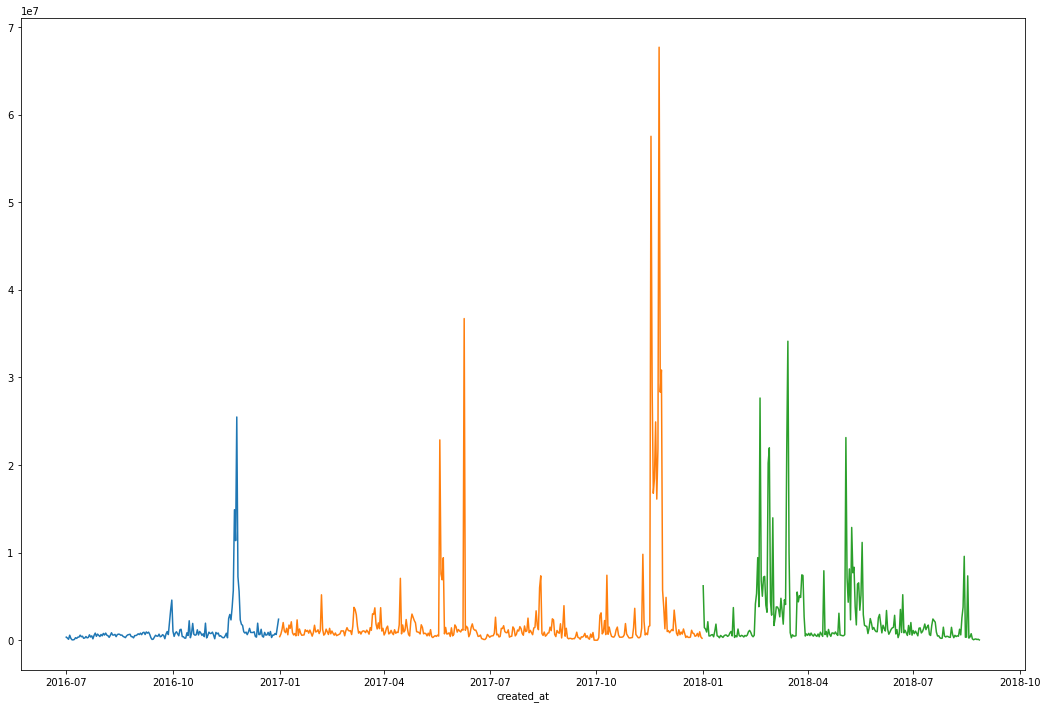

In [28]:
plt.figure(figsize=(18,12))
sns.lineplot(x = groupby_2016_grand_total.index,
             y = groupby_2016_grand_total.values)

sns.lineplot(x = groupby_2017_grand_total.index,
             y = groupby_2017_grand_total.values)

sns.lineplot(x = groupby_2018_grand_total.index,
             y = groupby_2018_grand_total.values)

In [ ]:
p.figure

### Closer look at the Grand Totals of each year, 2016-2018

<AxesSubplot:xlabel='created_at'>

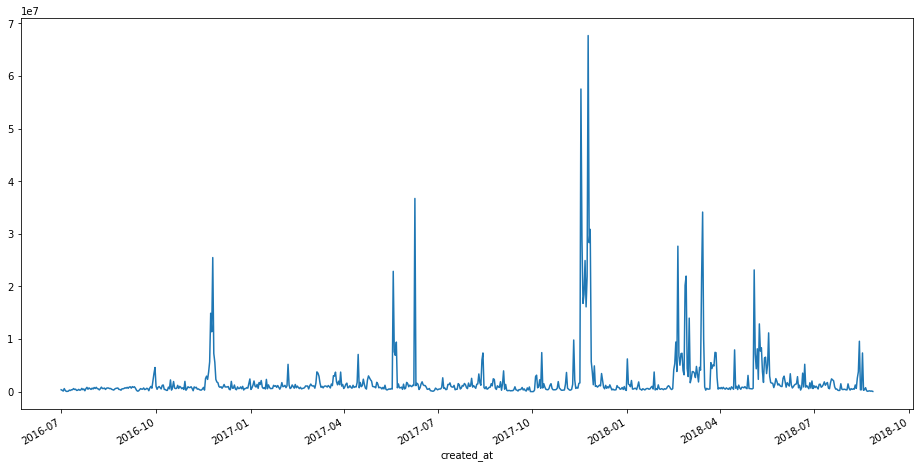

In [34]:
plt.figure(figsize=(16,8))
df_complete.groupby('created_at')['grand_total'].sum().plot(kind='line')

#### Breakdown of Status of Product Types

##### Luckily, there are very few cases of fraud

In [35]:
contingency_status = df.groupby('status')['category_name_1'].value_counts().unstack(level=0)
contingency_status

status,\N,canceled,closed,cod,complete,exchange,fraud,holded,order_refunded,paid,payment_review,pending,pending_paypal,processing,received,refund
category_name_1,,,,,,,,,,,,,,,,
Appliances,NaN,21628.0,92.0,109.0,20709.0,NaN,NaN,3.0,4665.0,43.0,6.0,6.0,NaN,1.0,4587.0,564.0
Beauty & Grooming,NaN,9686.0,57.0,329.0,20734.0,NaN,NaN,3.0,3612.0,114.0,2.0,NaN,NaN,1.0,6257.0,700.0
Books,NaN,273.0,7.0,81.0,910.0,NaN,NaN,NaN,223.0,13.0,NaN,NaN,NaN,NaN,336.0,27.0
Computing,NaN,6811.0,16.0,66.0,5735.0,1.0,1.0,2.0,1631.0,18.0,NaN,2.0,NaN,NaN,1422.0,228.0
Entertainment,NaN,12579.0,7.0,21.0,9327.0,NaN,2.0,2.0,2090.0,20.0,1.0,11.0,NaN,NaN,2119.0,146.0
Health & Sports,NaN,3382.0,15.0,76.0,8049.0,NaN,NaN,NaN,2227.0,18.0,4.0,NaN,1.0,1.0,3499.0,230.0
Home & Living,NaN,7199.0,15.0,394.0,11153.0,NaN,1.0,2.0,2499.0,78.0,NaN,1.0,1.0,1.0,4601.0,559.0
Kids & Baby,NaN,4081.0,5.0,147.0,7025.0,NaN,NaN,NaN,1827.0,63.0,NaN,NaN,NaN,NaN,2978.0,363.0
Men's Fashion,NaN,22024.0,65.0,600.0,40291.0,1.0,NaN,5.0,14800.0,105.0,6.0,NaN,3.0,20.0,12191.0,2109.0


* Food items are less likely to be cancelled ore refunded
* Mobiles and Tablets are very likely to have their order cancelled

### Plot o

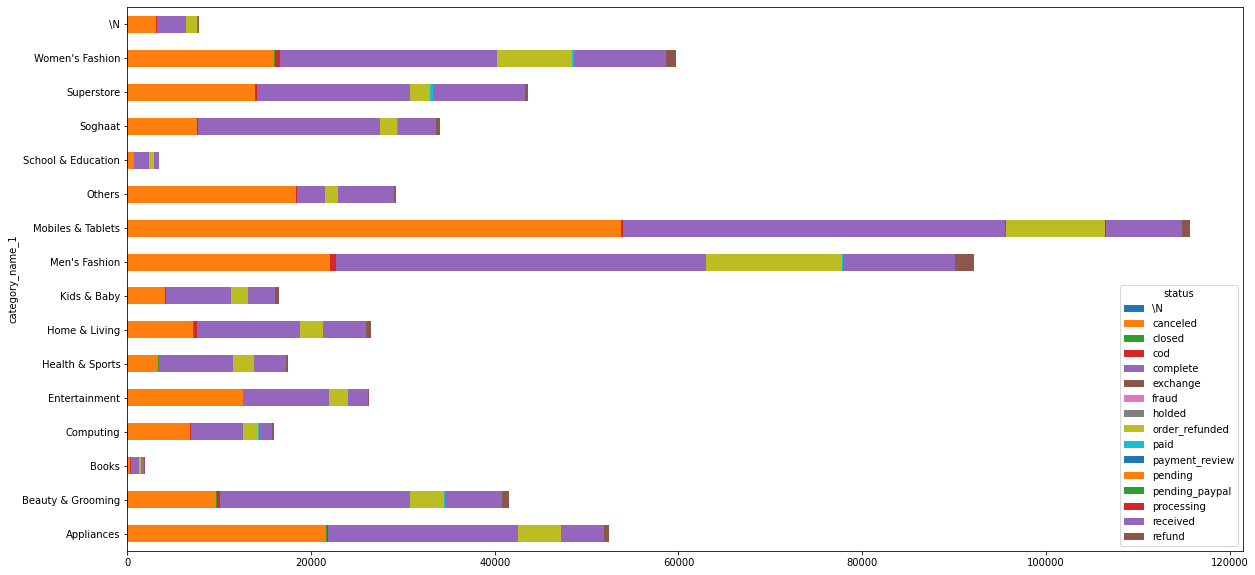

In [48]:
contingency_status.plot(kind='barh',stacked=True)
plt.gcf().set_size_inches(20, 10)

* Expect large amounts of orders for Mobiles and Tablets, Men's Fashion, Appliances in November.
* There was a very large spike in appliances ordered in March 

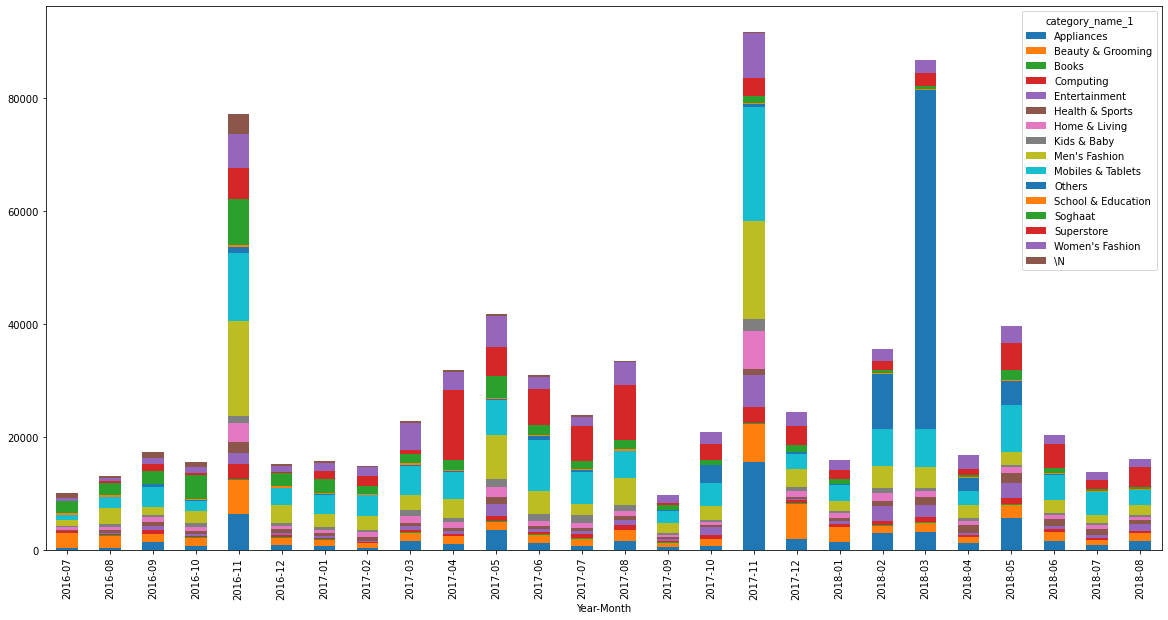

In [100]:
df.groupby(['category_name_1','Year-Month'])['qty_ordered'].sum().unstack(level= 0).plot(kind='bar',stacked=True)
plt.gcf().set_size_inches(20, 10)